# Exercises

### Exercise 1
---
Use the sklearn `make_blobs()` function, in the same way that we used in the lesson, to generate a *non linearly separable* dataset with 2 features.  
Fit a linear SVM to the dataset many times, varying the slack hyperparameter $C$, and calculate the model performance in classifying the data.  
What is, approximately, a the best value of the $C$ hyperparameter for this dataset?

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:

X_nsep, y_nsep = make_blobs(n_samples=100, n_features=2, centers=[[-1, 0], [1, 0]], cluster_std=.8)


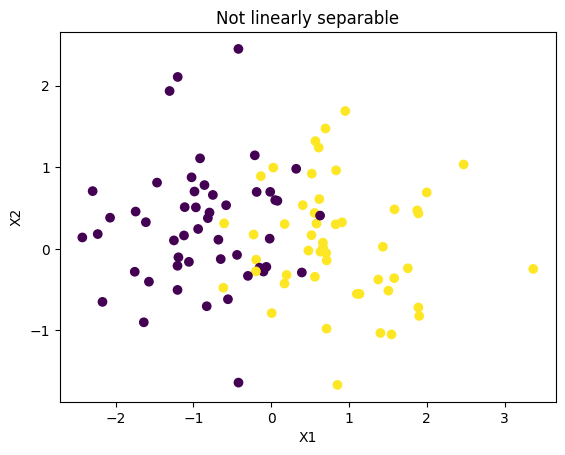

In [3]:

plt.title('Not linearly separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X_nsep[:, 0], X_nsep[:, 1], c=y_nsep)



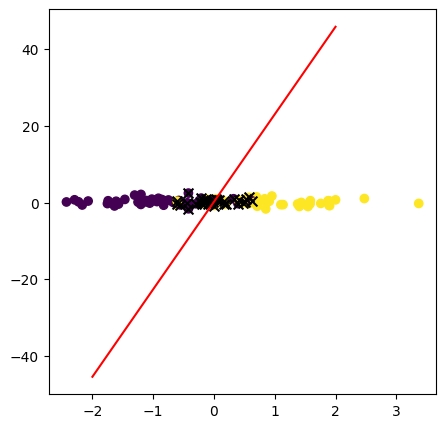

In [4]:
plt.figure(figsize=(5, 5))
X, y = X_nsep, y_nsep
svc_model = svm.SVC(kernel='linear', C=1)
svc_model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y_nsep)
w = svc_model.coef_[0]  # w consists of 2 elements
b = svc_model.intercept_[0]  # b consists of 1 element
x_points = np.linspace(-2, 2)  # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
plt.plot(x_points, y_points, c='r')  # Plotting a red hyperplane
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=50, c='k', marker='x')

For different C values

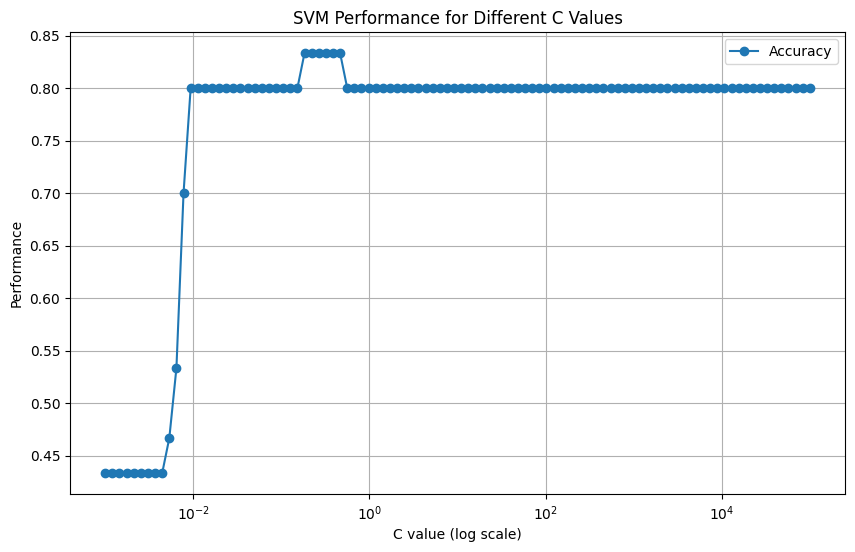

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_nsep, y_nsep, test_size=0.3, random_state=42)

# Define a range of C values to test
C_values = np.logspace(-3, 5, 100)

accuracy_scores = []
misclassification_rates = []

# Fit a linear SVM for each value of C and calculate the misclassification rate
for C in C_values:
    svc_model = SVC(kernel='linear', C=C)
    svc_model.fit(X_train, y_train)
    y_pred = svc_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    misclassification_rate = 1 - accuracy
    accuracy_scores.append(accuracy)
    misclassification_rates.append(misclassification_rate)

# Plot the accuracy scores and misclassification rates for different values of C
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracy_scores, marker='o', label='Accuracy')

plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Performance')
plt.title('SVM Performance for Different C Values')
plt.legend()
plt.grid(True)
plt.show()

An slight optimum seems to be around 0.8, but it also plateaus at around 0.01. This varies, however, strongly with the data set.

### Exercise 2
---
Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)).
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.


### Exercise 3
---
Use the code below to simulate new data.
Generate data and then decode the stimulus identity, see how the decoding performance change when you change the following:

- The amplitude of the noise in the firing rate
- The amplitude of the stimulus modulation of the firing rate
- The number of neurons

Plot and comment.

## Useful code
---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
n_cells = 20; # number of cells to simulate
n_stim_type = 2; # number of different stimuli
sigma_stim = 0.5 # amplitude of stimulus related modulation
average_firing_rate = 5; # average firing rate across the population

# generate baseline rates from exponential distirbution
cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

# create stimulus average responses, perturbing the population firng rate profile
# we use a multiplicative modulation in opposite directions for the two stimuli
modulation = sigma_stim*np.random.normal(0,1,size=n_cells)
cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
# sets negative firng rate to 0
cell_rate_stim[1][cell_rate_stim[1]<0]=0
cell_rate_stim[2][cell_rate_stim[2]<0]=0

In [ ]:
# simulate spiking activity

s_rate = 10000 # the sampling rate of our emulated recording system
noise_rate = 1 # we are going to add some spike noise non related to the task
n_stim = 100 # number of stimuli

stim_dur = 2 #stimulus duration (in seconds)
is_interval = 3 # interval between stimuli  (in seconds)

stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
np.random.shuffle(stim_type)

time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

spike_times = []
for cell in range(n_cells):
    spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
    for i,stimulus in enumerate(stim_type):
        stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
        spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

    spike_times.append(time[spikes>0])



In [ ]:
# save ouput
out_dict = {'spike_times':spike_times,
            'stim_onsets':stim_onsets,
            'stim_type':stim_type,
            'stim_duration':stim_dur
            }

with open('data/simulated_data1.pickle', 'wb') as handle:
    pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
